In [1]:
import pandas as pd
df = pd.read_csv('eth_std_transactions.csv', on_bad_lines='warn')  # or use 'skip' to skip silently
df.head()

/tmp/ipykernel_41/2163984265.py:2: ParserWarning: Skipping line 666013: expected 21 fields, saw 24

  df = pd.read_csv('eth_std_transactions.csv', on_bad_lines='warn')  # or use 'skip' to skip silently
/tmp/ipykernel_41/2163984265.py:2: ParserWarning: Skipping line 1355825: expected 21 fields, saw 29

  df = pd.read_csv('eth_std_transactions.csv', on_bad_lines='warn')  # or use 'skip' to skip silently
/tmp/ipykernel_41/2163984265.py:2: ParserWarning: Skipping line 2282030: expected 21 fields, saw 30

  df = pd.read_csv('eth_std_transactions.csv', on_bad_lines='warn')  # or use 'skip' to skip silently
/tmp/ipykernel_41/2163984265.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('eth_std_transactions.csv', on_bad_lines='warn')  # or use 'skip' to skip silently


,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,...,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,methodId,functionName,address
0,15629668,1664341955,0x145b95dd436962e0b578c0cd2ab5adbef79fce526db9...,1046,0xc2da9995985b082111eaccd1cc67ba389c7d6ea8ac77...,121,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,0xbdf1e3ad7b16e411d4d0d59bb8394eceea6e6974,124767359166856545,21000,...,0,1.0,0x,NaN,8953834,21000,145810,0x,NaN,0x00000000000cd56832ce5dfbcbff02e7ec639bc9
1,15629665,1664341919,0x3c824cc5dec70b0e82e195a306b7e89599d7f97d3a00...,1045,0xb0226d66180a1d1a6224f0c9f4f3c4809d020a31312d...,94,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0,137922,...,0,1.0,0x803ba26d000000000000000000000000000000000000...,NaN,7363491,126669,145813,0x803ba26d,"sellTokenForEthToUniswapV3(bytes encodedPath, ...",0x00000000000cd56832ce5dfbcbff02e7ec639bc9
2,15629662,1664341883,0xc70e01c66237f3618f4440abc1dea6659f999bf90b6c...,1044,0x990b899658add82d89b6448937e7d9499b077102ca87...,191,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,0x5faa989af96af85384b8a938c2ede4a7378d9875,0,46586,...,0,1.0,0x095ea7b3000000000000000000000000def1c0ded9be...,NaN,16327750,46586,145816,0x095ea7b3,"approve(address _spender, uint256 _value)",0x00000000000cd56832ce5dfbcbff02e7ec639bc9
3,15629658,1664341835,0x1108c358b7bf85fc3a329dcfae255c76389a7eef4a75...,1043,0x05422d693f860814bd3d82295fd6257f62a5e9e95258...,36,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0,147100,...,0,1.0,0x803ba26d000000000000000000000000000000000000...,NaN,3377545,135703,145820,0x803ba26d,"sellTokenForEthToUniswapV3(bytes encodedPath, ...",0x00000000000cd56832ce5dfbcbff02e7ec639bc9
4,15629656,1664341811,0x65173173633d47afc1082f1c98a192ee22e53f936bd0...,1042,0x47b55cd34d3a3b35315bbbf386efd02df465f50f9b45...,40,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,0x5380442d3c4ec4f5777f551f5edd2fa0f691a27c,0,49762,...,0,1.0,0x095ea7b3000000000000000000000000def1c0ded9be...,NaN,3807060,49416,145822,0x095ea7b3,"approve(address _spender, uint256 _value)",0x00000000000cd56832ce5dfbcbff02e7ec639bc9


In [2]:
# --- Imports ---
!pip install torch_geometric
!pip install optuna
import os
import time
import random

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW, SGD
from torch.utils.data import DataLoader, Dataset

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    auc,
)

# PyTorch Geometric
from torch_geometric.data import Data, Batch
from torch_geometric.nn import GCNConv, GATConv, SAGEConv


from tqdm.auto import tqdm
import optuna
from scipy.sparse import csr_matrix


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 828.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.4 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0


In [3]:
# --- Device and Reproducibility ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

Using device: cuda


In [4]:
class EthereumDataset(Dataset):
    def __init__(self, data, edge_index, features):
        self.data = data  # address mapping
        self.edge_index = edge_index
        self.features = features


    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):

        node_features = self.features[idx] 
        index = self.data.index[idx]
        return {
            'features': torch.tensor(node_features.toarray(), dtype=torch.float).squeeze(),
            'index': torch.tensor(index, dtype=torch.long)
        }

In [5]:
def load_and_preprocess(file_path, sample_size=None):
    """
    Loads, preprocesses, aggregates, and creates a PyTorch Geometric graph dataset
    for unsupervised anomaly detection.

    Args:
        file_path (str): Path to the CSV file.
        sample_size (int, optional): Number of samples to load (for testing).

    Returns:
        tuple: (graph_data, train_mask, val_mask, test_mask, num_features, address_to_id, scaler)
    """
    # --- 1. Reproducibility ---
    # --- 2. Load Data ---
    print(f"Loading data from {file_path}...")
    try:
        if sample_size:
            data = pd.read_csv(file_path, nrows=sample_size, on_bad_lines='warn')
            print(f"Loaded sample of size {sample_size}")
        else:
            data = pd.read_csv(file_path, on_bad_lines='warn')
        print("Data loaded.")
    except FileNotFoundError: print(f"ERROR: File not found at {file_path}."); raise
    except Exception as e: print(f"An unexpected error occurred while loading data: {e}"); raise

    # --- 3. Drop Columns ---
    columns_to_drop = [
        'blockNumber', 'timeStamp', 'hash', 'nonce', 'blockHash',
        'transactionIndex', 'isError', 'txreceipt_status', 'input',
        'contractAddress', 'cumulativeGasUsed', 'confirmations',
        'methodId', 'functionName','gas','gasPrice','gasUsed'
    ]
    for col in columns_to_drop:
        if col in data.columns: data = data.drop(columns=[col])
        else: print(f"Column '{col}' not found. Skipping drop.")

    # --- 4. Handle Missing Values ---
    print("Missing value counts before handling:"); print(data.isna().sum())
    for col in data.select_dtypes(include=np.number).columns: data[col] = data[col].fillna(data[col].median())
    for col in data.select_dtypes(include='object').columns:
        if col in ['from', 'to']: data[col] = data[col].fillna('MISSING_ADDRESS')
        else: data[col] = data[col].fillna('MISSING')
    print("Missing value counts after handling:"); print(data.isna().sum())

    # --- 5. Feature Engineering ---
    print("Performing feature engineering...")
    data['value'] = pd.to_numeric(data['value'], errors='coerce').fillna(0)
    data['value_ether'] = data['value'] / 1e18
    aggregated_data = data.groupby('from').agg(
        count=('from', 'size'), sum_value=('value_ether', 'sum'), mean_value=('value_ether', 'mean'),
        median_value=('value_ether', 'median'), min_value=('value_ether', 'min'), max_value=('value_ether', 'max'),
        std_value=('value_ether', 'std')).reset_index()
    print("Missing value counts in aggregated data (before final handling):"); print(aggregated_data.isna().sum())
    for col in aggregated_data.select_dtypes(include=np.number).columns: aggregated_data[col] = aggregated_data[col].fillna(aggregated_data[col].median())
    print("Missing value counts in aggregated data (after final handling):"); print(aggregated_data.isna().sum())
    print("Feature engineering complete.")

    # --- 6. Create Transaction Graph ---
    # Unpack the returned tuple
    graph_data, address_to_id = create_transaction_graph(data, aggregated_data)

    # --- 7. Train/Validation/Test Split ---
    train_indices, test_indices = train_test_split(np.arange(graph_data.num_nodes), test_size=0.2, random_state=42)
    train_indices, val_indices = train_test_split(train_indices, test_size=0.25, random_state=42)
    train_mask = torch.zeros(graph_data.num_nodes, dtype=torch.bool)
    val_mask = torch.zeros(graph_data.num_nodes, dtype=torch.bool)
    test_mask = torch.zeros(graph_data.num_nodes, dtype=torch.bool)
    train_mask[train_indices] = True
    val_mask[val_indices] = True
    test_mask[test_indices] = True
    graph_data.train_mask = train_mask
    graph_data.val_mask = val_mask
    graph_data.test_mask = test_mask

    # --- 8. Prepare Node Features (Scale) ---
    features = graph_data.x.clone()
    scaler = StandardScaler()
    if features.dtype == torch.float:
         features = torch.tensor(scaler.fit_transform(features), dtype=torch.float)
    graph_data.x = features

    # --- 9. Calculate num_features ---
    num_features = graph_data.x.shape[1]

    print("Data loading, preprocessing, and graph creation complete.")

    # Return graph_data, masks, scaler, etc. (use the received address_to_id)
    return graph_data, train_mask, val_mask, test_mask, num_features, address_to_id, scaler

In [6]:
import torch
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler

def create_transaction_graph(data, aggregated_data):
    """
    Creates a PyTorch Geometric Data object representing the transaction graph.

    Args:
        data: DataFrame with raw transaction data ('from', 'to', 'value').
        aggregated_data: aggregated data, used for features

    Returns:
        tuple: (PyTorch Geometric Data object, address_to_id mapping)
    """
    print("Creating transaction graph...")

    # 1. Address Mapping
    try:
        data['from'] = data['from'].astype(str)
        data['to'] = data['to'].astype(str).fillna('MISSING_ADDRESS')
        addresses = pd.concat([data['from'], data['to']]).unique()
        addresses = [addr for addr in addresses if addr != 'MISSING_ADDRESS']
        address_to_id = {addr: i for i, addr in enumerate(addresses)}
        id_to_address = {i: addr for i, addr in enumerate(addresses)}
        print(f"Address mapping complete. Num unique addresses: {len(addresses)}")
    except Exception as e:
        print(f"ERROR during address mapping: {e}")
        raise

    # 2. Create Edge Index
    try:
        valid_transactions = data[(data['from'] != 'MISSING_ADDRESS') & (data['to'] != 'MISSING_ADDRESS')]
        edge_list = []
        for _, row in valid_transactions.iterrows():
            if row['from'] in address_to_id and row['to'] in address_to_id:
                 edge_list.append([address_to_id[row['from']], address_to_id[row['to']]])

        if not edge_list:
            print("WARNING: No valid edges found after filtering.")
            # Handle empty graph case - returns empty tensors or raise error
            edge_index = torch.empty((2, 0), dtype=torch.long)
        else:
             edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()

        print(f"Edge index created. Shape: {edge_index.shape}")
        # Check for invalid indices (greater than num nodes - 1)
        if edge_index.numel() > 0: # Only check if edges exist
             max_node_id = len(addresses) - 1
             if edge_index.max() > max_node_id:
                  print(f"ERROR: Max index in edge_index ({edge_index.max()}) exceeds max node ID ({max_node_id})")
                  # Consider raising an error or further debugging
    except Exception as e:
        print(f"ERROR during edge index creation: {e}")
        raise

    # 3. Prepare Node Features
    try:
        aggregated_data['from'] = aggregated_data['from'].astype(str)
        features_df = aggregated_data.set_index('from')
        features_df = features_df.reindex(addresses, fill_value=0)
        # Check for NaNs introduced by reindexing or originally present
        if features_df.isnull().values.any():
             print("WARNING: NaNs found in features_df after reindexing. Filling with 0.")
             features_df.fillna(0, inplace=True)

        features = torch.tensor(features_df.values, dtype=torch.float)
        print(f"Features tensor created. Shape: {features.shape}")
        # Check for NaNs/Infs in features
        if torch.isnan(features).any() or torch.isinf(features).any():
             print("ERROR: NaNs or Infs found in features tensor.")
             # Consider raising an error or imputation
    except Exception as e:
        print(f"ERROR during feature preparation: {e}")
        raise

    # 4. Create PyTorch Geometric Data Object
    try:
        print("--- Debugging before Data() ---")
        print(f"Features shape: {features.shape}, dtype: {features.dtype}")
        print(f"Edge index shape: {edge_index.shape}, dtype: {edge_index.dtype}")
        print(f"Features contain NaNs: {torch.isnan(features).any()}")
        print(f"Features contain Infs: {torch.isinf(features).any()}")
        print(f"Edge index max value: {edge_index.max().item() if edge_index.numel() > 0 else 'N/A'}")
        print(f"Expected number of nodes (from features): {features.shape[0]}")
        print("--- End Debugging ---")

        graph_data = Data(x=features, edge_index=edge_index)
        print("Data object created successfully.")

        graph_data.num_nodes = features.shape[0]
        graph_data.id_to_address = id_to_address
        print(f"num_nodes set to: {graph_data.num_nodes}")

    except Exception as e:
        print(f"ERROR during Data object creation: {e}")
        # If this fails, graph_data might not be assigned, leading to the NameError
        # Prints variables again just before the potential error point
        print("--- State just before potential Data() error ---")
        print(f"Features shape: {features.shape}, dtype: {features.dtype}")
        print(f"Edge index shape: {edge_index.shape}, dtype: {edge_index.dtype}")
        print(f"Features contain NaNs: {torch.isnan(features).any()}")
        print(f"Features contain Infs: {torch.isinf(features).any()}")
        print("--- End State ---")
        raise # Re-raise the exception to see the specific Data() error

    print("Transaction graph created function finished.")
    # Return BOTH graph_data AND address_to_id
    return graph_data, address_to_id

In [7]:
# Load and preprocess (version for unsupervised learning with raw data and GNN)
graph_data, train_mask, val_mask, test_mask, num_features, address_to_id, scaler = load_and_preprocess("eth_std_transactions.csv")
#graph_data, train_mask, val_mask, test_mask, num_features, address_to_id, scaler = load_and_preprocess("eth_std_transactions.csv", sample_size = 1000) #for testing

# Prints some info to verify
print(f"Number of nodes: {graph_data.num_nodes}")
print(f"Number of edges: {graph_data.edge_index.shape[1]}")
print(f"Number of features: {num_features}")
print(f"Training nodes: {train_mask.sum().item()}")
print(f"Validation nodes: {val_mask.sum().item()}")
print(f"Test nodes: {test_mask.sum().item()}")

Loading data from eth_std_transactions.csv...


/tmp/ipykernel_41/4163667575.py:21: ParserWarning: Skipping line 666013: expected 21 fields, saw 24

  data = pd.read_csv(file_path, on_bad_lines='warn')
/tmp/ipykernel_41/4163667575.py:21: ParserWarning: Skipping line 1355825: expected 21 fields, saw 29

  data = pd.read_csv(file_path, on_bad_lines='warn')
/tmp/ipykernel_41/4163667575.py:21: ParserWarning: Skipping line 2282030: expected 21 fields, saw 30

  data = pd.read_csv(file_path, on_bad_lines='warn')
/tmp/ipykernel_41/4163667575.py:21: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, on_bad_lines='warn')


Data loaded.
Missing value counts before handling:
from          0
to         1471
value         0
address       0
dtype: int64
Missing value counts after handling:
from       0
to         0
value      0
address    0
dtype: int64
Performing feature engineering...
Missing value counts in aggregated data (before final handling):
from                0
count               0
sum_value           0
mean_value          0
median_value        0
min_value           0
max_value           0
std_value       32654
dtype: int64
Missing value counts in aggregated data (after final handling):
from            0
count           0
sum_value       0
mean_value      0
median_value    0
min_value       0
max_value       0
std_value       0
dtype: int64
Feature engineering complete.
Creating transaction graph...
Address mapping complete. Num unique addresses: 198674
Edge index created. Shape: torch.Size([2, 2873163])
Features tensor created. Shape: torch.Size([198674, 7])
--- Debugging before Data() ---
Featur

In [8]:
from sklearn.ensemble import IsolationForest

# --- Model Definition and Training (Isolation Forest) ---

# 1. Instantiate the model
isolation_forest = IsolationForest(n_estimators=100,
                                  max_samples='auto',
                                  contamination='auto',
                                  random_state=42,
                                  n_jobs=-1)

# 2. Train the model using features of training nodes
train_features = graph_data.x[train_mask].numpy()

print("Training Isolation Forest...")
isolation_forest.fit(train_features)
print("Training complete.")

# 3. Get anomaly scores on the training data
train_anomaly_scores = isolation_forest.decision_function(train_features)
print("Example anomaly scores (training data):", train_anomaly_scores[:10])

# --- Prediction (Example on Validation Set) ---
val_features = graph_data.x[val_mask].numpy()
val_preds = isolation_forest.predict(val_features)
val_indices = np.where(val_mask.numpy())[0] # Get indices of validation nodes

# Map predictions to original addresses (for interpretability)
val_address = [graph_data.id_to_address[i] for i in val_indices] # Get addresses using mapping
val_predictions_df = pd.DataFrame({'index': val_indices, 'prediction': val_preds, 'address': val_address})

print("Anomalies in validation set:")
print(val_predictions_df[val_predictions_df['prediction'] == -1])

Training Isolation Forest...
Training complete.
Example anomaly scores (training data): [-0.31623336  0.13421611 -0.00173787 -0.31733862 -0.02925904 -0.28991107
 -0.07214899 -0.35126862  0.05298468  0.15863414]
Anomalies in validation set:
       index  prediction                                     address
0          0          -1  0x00000000000cd56832ce5dfbcbff02e7ec639bc9
1          3          -1  0xc098b2a3aa256d2140208c3de6543aaef5cd3a94
2         17          -1  0x151b381058f91cf871e7ea1ee83c45326f61e96d
3         19          -1  0x28c6c06298d514db089934071355e5743bf21d60
4         29          -1  0xeb2629a2734e272bcc07bda959863f316f4bd4cf
...      ...         ...                                         ...
13031  64970          -1  0x002a569f60e13a3113fdeec15c725c42e3b9d6ea
13038  65028          -1  0x0993c90398c0791d6aa5702973e5ab31e35dd109
13039  65030          -1  0xed7085f9f8cc751d83a963d7bc522d9557755784
13040  65032          -1  0x11287f5721dc3a4122b0d11d763038fcf3af7a0a
1

In [9]:
def perform_time_analysis(data, val_results_df):
    """
    Performs time-based analysis of anomaly scores.

    Args:
        data: DataFrame with the raw data (including 'timeStamp' and 'from').
        val_results_df: DataFrame with validation results (including 'address').

    Returns:
        analysis_df: DataFrame for time-based analysis, or None if an error occurs.
    """
    print("Starting perform_time_analysis...")

    # --- Input Validation ---
    if 'timeStamp' not in data.columns:
        print("ERROR: 'timeStamp' column not found in 'data' DataFrame.")
        return None
    if 'from' not in data.columns:
        print("ERROR: 'from' column not found in 'data' DataFrame.")
        return None
    if 'address' not in val_results_df.columns:
        print("ERROR: 'address' column not found in 'val_results_df' DataFrame.")
        return None
    if 'anomaly_score' not in val_results_df.columns:
        print("ERROR: 'anomaly_score' column not found in 'val_results_df' DataFrame")
        return None


    # Convert 'timeStamp' to datetime objects
    print("Converting 'timeStamp' to datetime...")
    try:
        data['timeStamp'] = pd.to_datetime(data['timeStamp'], unit='s')
    except Exception as e:
        print(f"ERROR: Could not convert 'timeStamp' to datetime: {e}")
        return None

    # Sort val_results_df by 'index' (important for consistency)
    print("Sorting val_results_df...")
    val_results_df = val_results_df.sort_values(by='index')

    # --- Merge ---
    print("Merging dataframes...")
    try:
        # Explicitly check and handle different 'from' column names
        if 'from' in data.columns:
            merged_data = pd.merge(val_results_df, data[['timeStamp', 'from']],
                                   left_on='address', right_on='from', how='left')
        else:
             print("ERROR: 'from' column not found in 'data' DataFrame")
             return None

        print("Merge successful. Columns in merged_data:")
        print(merged_data.columns)

        # --- Deduplication and Column Selection ---
        print("Deduplicating and selecting columns...")
        # Use 'address' for deduplication as it comes from val_results
        deduplicated_data = merged_data.drop_duplicates(subset=['address'])

        required_columns = ['address', 'timeStamp', 'anomaly_score', 'count', 'sum_value', 'mean_value', 'prediction']
        available_columns = [col for col in required_columns if col in deduplicated_data.columns]
        if not available_columns:
                print("None of the required columns are available.")
                return None

        analysis_df = deduplicated_data[available_columns].sort_values(by='anomaly_score')

        print("Time analysis complete.")
        return analysis_df

    except Exception as e:
        print(f"ERROR during merge or data processing: {e}")
        return None

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


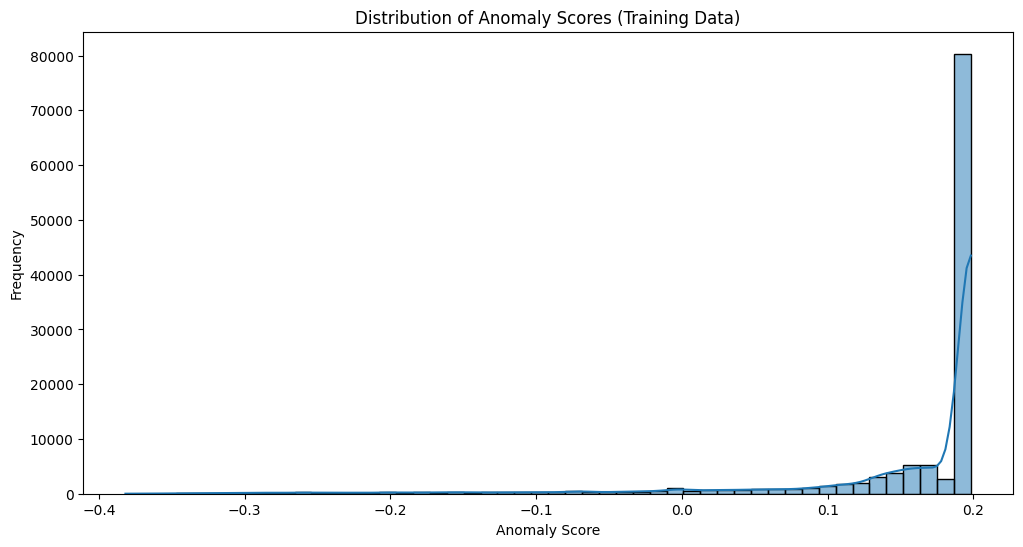


Anomaly Score Quantiles (Training Data):
   Quantile     Score
0      0.01 -0.258193
1      0.05 -0.034226
2      0.10  0.069635
3      0.25  0.158865
4      0.50  0.198273
5      0.75  0.198273
6      0.90  0.198273
7      0.95  0.198273
8      0.99  0.198273


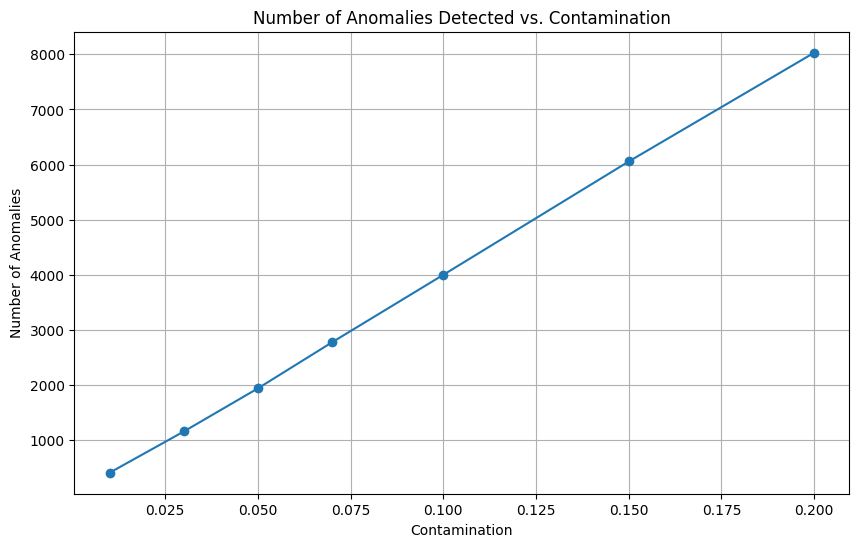

/tmp/ipykernel_41/4142723244.py:68: ParserWarning: Skipping line 666013: expected 21 fields, saw 24

  temp_data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')
/tmp/ipykernel_41/4142723244.py:68: ParserWarning: Skipping line 1355825: expected 21 fields, saw 29

  temp_data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')
/tmp/ipykernel_41/4142723244.py:68: ParserWarning: Skipping line 2282030: expected 21 fields, saw 30

  temp_data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')
/tmp/ipykernel_41/4142723244.py:68: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')



Top 20 Most Anomalous Addresses (Validation Set) - Detailed:
       index  prediction                                     address  \
10181  50809          -1  0x6afe095682c8d99b3dde15bed653682b08d23aea   
520     2528          -1  0xd48770bc275744319f89e67a3b20f4effc269d9c   
8557   42604          -1  0xeedd33aa387a6e9338bd8b98e1aa565fef88f837   
484     2359          -1  0x966bbd2ae0d010fbd853bd5054faa19b5a200594   
10180  50806          -1  0xf7e1b69b7d15a899a0e2016b400ee063ba4140b7   
12974  64705          -1  0xf02b3b3ee9c48b4faca2ad8bcc8fd5a07f112124   
12973  64704          -1  0x62fbdf57143050bab08f2aa04a1751a60e366348   
11231  56240          -1  0xeef5a1f6ced7e72d0c52f342fa1cb6e8cc5fd9a9   
491     2407          -1  0x06a6cd08ec265e5eafbe8a7edceb119792eb3870   
12061  60107          -1  0xce6f684dc06e4a4fe8383b60e32f85a51559fc87   
9872   49235          -1  0xbbd78233f019e3774baa601b613cea31bbddd4bf   
5436   27049          -1  0x955a27306f1eb21757ccbd8daa2de82675aabc36   
12

/tmp/ipykernel_41/4142723244.py:94: ParserWarning: Skipping line 666013: expected 21 fields, saw 24

  data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')
/tmp/ipykernel_41/4142723244.py:94: ParserWarning: Skipping line 1355825: expected 21 fields, saw 29

  data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')
/tmp/ipykernel_41/4142723244.py:94: ParserWarning: Skipping line 2282030: expected 21 fields, saw 30

  data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')
/tmp/ipykernel_41/4142723244.py:94: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')


Starting perform_time_analysis...
Converting 'timeStamp' to datetime...
Sorting val_results_df...
Merging dataframes...
Merge successful. Columns in merged_data:
Index(['index', 'prediction', 'address', 'anomaly_score', 'from_x', 'count',
       'sum_value', 'mean_value', 'median_value', 'min_value', 'max_value',
       'std_value', 'timeStamp', 'from_y'],
      dtype='object')
Deduplicating and selecting columns...
Time analysis complete.
Plotting time-based analysis...


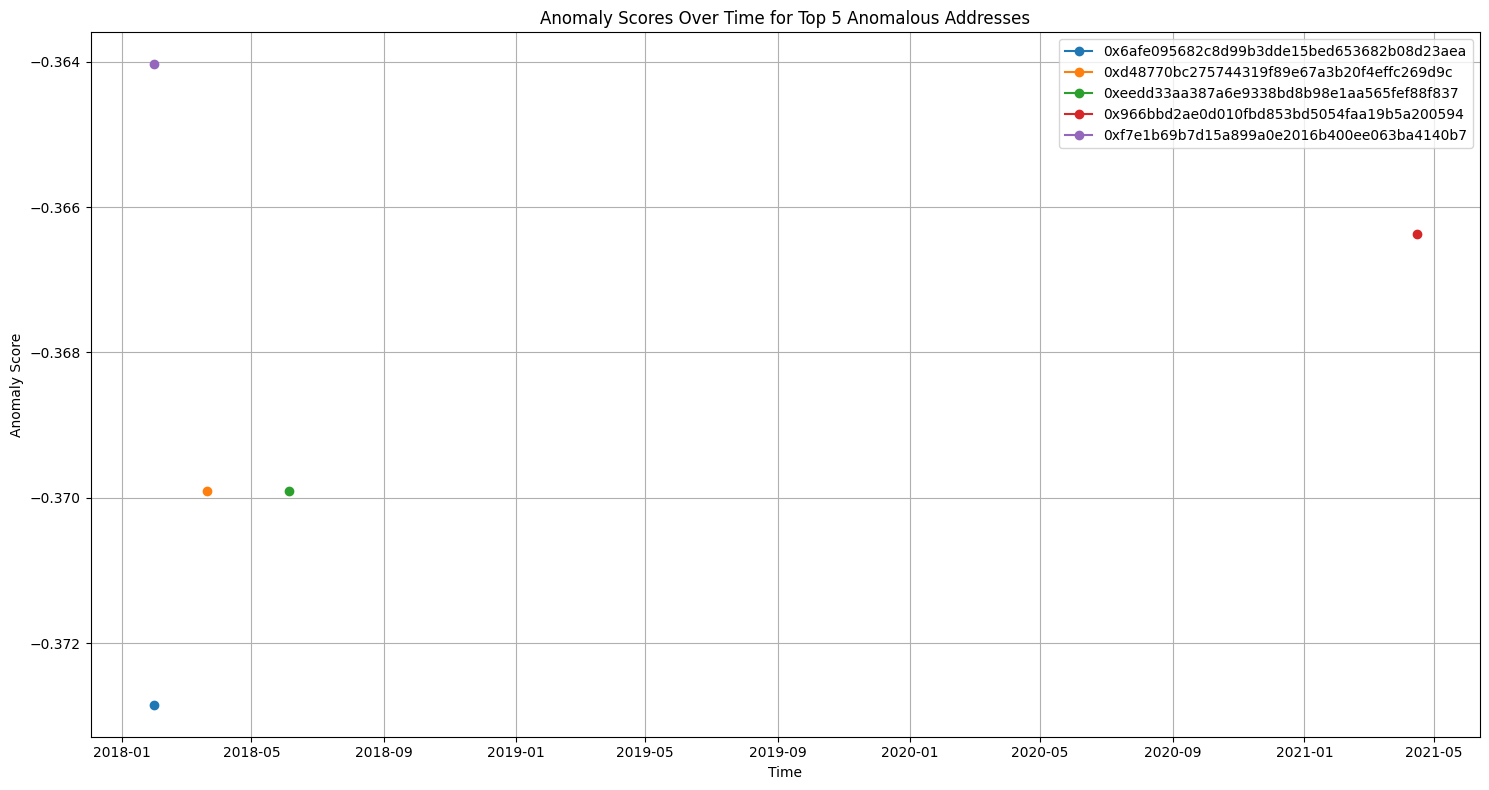

In [10]:
# --- Detailed Evaluation and Analysis ---
import seaborn as sns

# Get validation features ONCE
val_features = graph_data.x[val_mask].numpy()
val_indices = np.where(val_mask.numpy())[0]
val_address = [graph_data.id_to_address[i] for i in val_indices]

# 1. Anomaly Score Distribution (Training Data - already calculated)
plt.figure(figsize=(12, 6))
sns.histplot(train_anomaly_scores, bins=50, kde=True)
plt.title("Distribution of Anomaly Scores (Training Data)")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

# Calculate quantiles
quantiles = np.quantile(train_anomaly_scores, [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\nAnomaly Score Quantiles (Training Data):")
print(pd.DataFrame({'Quantile': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99], 'Score': quantiles}))

# 2. Vary `contamination` and Analyze
contamination_values = [0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2]
num_anomalies = []

# Get training features once
train_features = graph_data.x[train_mask].numpy()

for contamination in contamination_values:
    # Use best params for n_estimators and max_samples if available, else use defaults
    n_est = best_params.get('n_estimators', 100) if 'best_params' in locals() else 100
    m_samp = best_params.get('max_samples', 'auto') if 'best_params' in locals() else 'auto'

    model = IsolationForest(n_estimators=n_est,
                            max_samples=m_samp,
                            contamination=contamination,
                            random_state=42,
                            n_jobs=-1)
    model.fit(train_features) # Train on training features
    preds = model.predict(val_features) # Predict on validation features
    num_anomalies.append(np.sum(preds == -1))

plt.figure(figsize=(10, 6))
plt.plot(contamination_values, num_anomalies, marker='o')
plt.title("Number of Anomalies Detected vs. Contamination")
plt.xlabel("Contamination")
plt.ylabel("Number of Anomalies")
plt.grid(True)
plt.show()

# 3. Qualitative Analysis (Deep Dive) - Using the initial isolation_forest model
# Calculate anomaly scores on validation features CORRECTLY
val_anomaly_scores = isolation_forest.decision_function(val_features) 
# val_preds are predictions from the initial model 

val_results_df = pd.DataFrame({
    'index': val_indices,
    'prediction': val_preds, 
    'address': val_address,
    'anomaly_score': val_anomaly_scores
})

# Merge with aggregated data (aggregated_data is available globally or returned)
# If aggregated_data was created inside load_and_preprocess, return it too
if 'aggregated_data' not in locals():
     print("WARNING: aggregated_data not found globally. Recreating.")
     # Minimal recreation (adjust if your aggregation was more complex)
     temp_data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')
     temp_data['value'] = pd.to_numeric(temp_data['value'], errors='coerce').fillna(0)
     temp_data['value_ether'] = temp_data['value'] / 1e18
     aggregated_data = temp_data.groupby('from').agg(
         count=('from', 'size'), sum_value=('value_ether', 'sum'), mean_value=('value_ether', 'mean'),
         median_value=('value_ether', 'median'), min_value=('value_ether', 'min'), max_value=('value_ether', 'max'),
         std_value=('value_ether', 'std')).reset_index()
     for col in aggregated_data.select_dtypes(include=np.number).columns:
         aggregated_data[col] = aggregated_data[col].fillna(aggregated_data[col].median())


val_results_df = val_results_df.merge(aggregated_data, left_on='address', right_on='from', how='left')
val_results_df = val_results_df.sort_values(by='anomaly_score')

print("\nTop 20 Most Anomalous Addresses (Validation Set) - Detailed:")
print(val_results_df.head(20))

# --- Example: Manual Inspection (using Etherscan) ---
top_anomalous_addresses = val_results_df['address'].head(5).tolist()
print("\nExample Addresses for Manual Inspection (Etherscan):")
for addr in top_anomalous_addresses:
    print(f"  https://etherscan.io/address/{addr}")
print("  (Manually inspect these addresses and their transactions on Etherscan)")

# --- 4. Time-Based Analysis ---
# Load the raw data again
data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')

# Call the function
analysis_df = perform_time_analysis(data, val_results_df)

# Checks if analysis_df is None before proceeding
if analysis_df is not None:
    print("Plotting time-based analysis...") 
    # Plotting 
    plt.figure(figsize=(15, 8))
    # Ensures 'address' column exists before plotting
    if 'address' in analysis_df.columns:
        top_addresses = analysis_df.head(5)['address'].tolist()
        for address in top_addresses:
            address_data = analysis_df[analysis_df['address'] == address]
            address_data = address_data.sort_values('timeStamp')
            plt.plot(address_data['timeStamp'], address_data['anomaly_score'], marker='o', label=address)

        plt.title('Anomaly Scores Over Time for Top 5 Anomalous Addresses')
        plt.xlabel('Time')
        plt.ylabel('Anomaly Score')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping time-based plot: 'address' column missing in analysis_df.")
else:
    print("Skipping time-based analysis plotting due to errors during analysis function.")

In [11]:
import optuna

def objective(trial):
    """Objective function for Optuna optimization."""
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_samples = trial.suggest_categorical("max_samples", ["auto", 0.5, 0.7, 1.0])
    if isinstance(max_samples, (int, float)):
        max_samples = min(max_samples, 1.0)
    contamination = trial.suggest_float("contamination", 0.01, 0.2)

    model = IsolationForest(
        n_estimators=n_estimators,
        max_samples=max_samples,
        contamination=contamination,
        random_state=42,
        n_jobs=-1
    )

    # Train on training features
    train_features = graph_data.x[train_mask].numpy()
    model.fit(train_features)

    # Evaluate on validation features
    val_features = graph_data.x[val_mask].numpy()
    val_anomaly_scores = model.decision_function(val_features)

    return np.mean(val_anomaly_scores)

study = optuna.create_study(direction="minimize")
print("Starting Optuna optimization...")
study.optimize(objective, n_trials=100)
print("Optimization complete.")

best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Retrain with Best Hyperparameters
best_model = IsolationForest(
    n_estimators=best_params['n_estimators'],
    max_samples=best_params['max_samples'],
    contamination=best_params['contamination'],
    random_state=42,
    n_jobs=-1
)
# Train on training features
train_features = graph_data.x[train_mask].numpy()
best_model.fit(train_features)
print("Best model trained.")

[I 2025-03-28 12:18:56,655] A new study created in memory with name: no-name-d16b8e7a-220e-4f95-b18d-6581d63a599a


Starting Optuna optimization...


[I 2025-03-28 12:19:09,735] Trial 0 finished with value: 0.006481665123424168 and parameters: {'n_estimators': 313, 'max_samples': 0.7, 'contamination': 0.142423174743765}. Best is trial 0 with value: 0.006481665123424168.
[I 2025-03-28 12:19:28,604] Trial 1 finished with value: 0.03166226748036913 and parameters: {'n_estimators': 447, 'max_samples': 0.7, 'contamination': 0.05117908674572889}. Best is trial 0 with value: 0.006481665123424168.
[I 2025-03-28 12:19:43,668] Trial 2 finished with value: 0.007007245162518801 and parameters: {'n_estimators': 390, 'max_samples': 0.7, 'contamination': 0.13231415991948592}. Best is trial 0 with value: 0.006481665123424168.
[I 2025-03-28 12:19:49,513] Trial 3 finished with value: 0.009004436605661817 and parameters: {'n_estimators': 159, 'max_samples': 0.5, 'contamination': 0.12267611394983456}. Best is trial 0 with value: 0.006481665123424168.
[I 2025-03-28 12:19:52,127] Trial 4 finished with value: 0.01115725448061763 and parameters: {'n_estima

Optimization complete.
Best hyperparameters: {'n_estimators': 153, 'max_samples': 0.5, 'contamination': 0.19993782017152065}
Best model trained.


In [12]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Get train and validation features ONCE
train_features = graph_data.x[train_mask].numpy()
val_features = graph_data.x[val_mask].numpy()

# --- One-Class SVM ---
print("\n--- Training One-Class SVM ---")
ocsvm = OneClassSVM(gamma='auto', nu=0.05) # Initial parameters
ocsvm.fit(train_features)

# Makes predictions on validation
val_preds_ocsvm = ocsvm.predict(val_features)
print("One-Class SVM predictions (validation):", val_preds_ocsvm[:10])

# --- Local Outlier Factor ---
print("\n--- Training Local Outlier Factor ---")
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto', novelty=True) # Initial parameters
lof.fit(train_features) # Fit on train features

# Makes predictions on validation
val_preds_lof = lof.predict(val_features)
print("LOF predictions (validation):", val_preds_lof[:10])


--- Training One-Class SVM ---
One-Class SVM predictions (validation): [-1 -1 -1 -1 -1 -1  1  1 -1 -1]

--- Training Local Outlier Factor ---
LOF predictions (validation): [-1 -1  1 -1  1 -1  1  1 -1  1]


In [13]:
import optuna

def objective_ocsvm(trial):
    """Objective function for Optuna optimization of OneClassSVM."""
    nu = trial.suggest_float("nu", 0.01, 0.5)
    gamma = trial.suggest_categorical("gamma", ['scale', 'auto'])

    model = OneClassSVM(nu=nu, gamma=gamma, kernel='rbf')

    # Train on training features
    train_features = graph_data.x[train_mask].numpy()
    model.fit(train_features)

    # Evaluate on validation features
    val_features = graph_data.x[val_mask].numpy()
    val_anomaly_scores = model.decision_function(val_features)

    return np.mean(val_anomaly_scores)

study_ocsvm = optuna.create_study(direction="minimize")
print("Starting Optuna optimization for One-Class SVM...")
study_ocsvm.optimize(objective_ocsvm, n_trials=30)
print("Optimization complete.")

best_params_ocsvm = study_ocsvm.best_params
print(f"Best hyperparameters (OCSVM): {best_params_ocsvm}")

# Retrain with Best Hyperparameters
best_ocsvm = OneClassSVM(
    nu=best_params_ocsvm['nu'],
    gamma=best_params_ocsvm['gamma'],
    kernel='rbf'
)
# Train on training features
train_features = graph_data.x[train_mask].numpy()
best_ocsvm.fit(train_features)
print("Best OCSVM model trained.")

[I 2025-03-28 12:44:58,755] A new study created in memory with name: no-name-2683478f-09d2-4e25-b2fd-51128b3f3b00


Starting Optuna optimization for One-Class SVM...


[I 2025-03-28 13:08:49,922] Trial 0 finished with value: -750.6864925775484 and parameters: {'nu': 0.3400581069688065, 'gamma': 'auto'}. Best is trial 0 with value: -750.6864925775484.
[I 2025-03-28 13:34:19,444] Trial 1 finished with value: -673.1269632900708 and parameters: {'nu': 0.31352976921818987, 'gamma': 'scale'}. Best is trial 0 with value: -750.6864925775484.
[I 2025-03-28 14:00:07,403] Trial 2 finished with value: -936.8387088359617 and parameters: {'nu': 0.4131958347651668, 'gamma': 'auto'}. Best is trial 2 with value: -936.8387088359617.
[I 2025-03-28 14:19:52,163] Trial 3 finished with value: -367.31001016579864 and parameters: {'nu': 0.19003175984108386, 'gamma': 'scale'}. Best is trial 2 with value: -936.8387088359617.
[I 2025-03-28 14:43:08,583] Trial 4 finished with value: -730.2803468441874 and parameters: {'nu': 0.33203510166843864, 'gamma': 'auto'}. Best is trial 2 with value: -936.8387088359617.
[I 2025-03-28 15:07:54,950] Trial 5 finished with value: -929.9769473

Optimization complete.
Best hyperparameters (OCSVM): {'nu': 0.49988793275310295, 'gamma': 'auto'}
Best OCSVM model trained.


In [14]:
import optuna

def objective_lof(trial):
    """Objective function for Optuna optimization of LocalOutlierFactor."""
    n_neighbors = trial.suggest_int("n_neighbors", 5, 50)
    contamination = trial.suggest_float("contamination", 0.01, 0.2)

    model = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=True)

    # Train on training features
    train_features = graph_data.x[train_mask].numpy()
    model.fit(train_features)

    # Evaluate on validation features
    val_features = graph_data.x[val_mask].numpy()
    val_anomaly_scores = model.decision_function(val_features)

    return np.mean(val_anomaly_scores)

study_lof = optuna.create_study(direction="maximize") # Maximize for LOF
print("Starting Optuna optimization for LOF...")
study_lof.optimize(objective_lof, n_trials=30)
print("Optimization complete.")

best_params_lof = study_lof.best_params
print(f"Best hyperparameters (LOF): {best_params_lof}")

# Retrain with Best Hyperparameters
best_lof = LocalOutlierFactor(
    n_neighbors=best_params_lof['n_neighbors'],
    contamination=best_params_lof['contamination'],
    novelty=True
)
# Train on training features
train_features = graph_data.x[train_mask].numpy()
best_lof.fit(train_features)
print("Best LOF model trained.")

[I 2025-03-29 00:42:47,624] A new study created in memory with name: no-name-3d350462-aa14-4ce1-ad88-27f4817a850e


Starting Optuna optimization for LOF...


[I 2025-03-29 00:50:39,246] Trial 0 finished with value: -382766.625 and parameters: {'n_neighbors': 49, 'contamination': 0.03410420978536332}. Best is trial 0 with value: -382766.625.
[I 2025-03-29 00:58:39,831] Trial 1 finished with value: -244156.5 and parameters: {'n_neighbors': 37, 'contamination': 0.18691557165572398}. Best is trial 1 with value: -244156.5.
[I 2025-03-29 01:06:34,468] Trial 2 finished with value: -161140.578125 and parameters: {'n_neighbors': 9, 'contamination': 0.0920665565659778}. Best is trial 2 with value: -161140.578125.
[I 2025-03-29 01:14:25,225] Trial 3 finished with value: -220827.5625 and parameters: {'n_neighbors': 35, 'contamination': 0.10495556682073488}. Best is trial 2 with value: -161140.578125.
[I 2025-03-29 01:22:11,898] Trial 4 finished with value: -339787.09375 and parameters: {'n_neighbors': 46, 'contamination': 0.09160907388829288}. Best is trial 2 with value: -161140.578125.
[I 2025-03-29 01:30:12,458] Trial 5 finished with value: -210979.1

Optimization complete.
Best hyperparameters (LOF): {'n_neighbors': 21, 'contamination': 0.01015914403853456}
Best LOF model trained.


In [15]:
# Final Predictions and Model Saving

import joblib  # For saving the model

# --- Final Predictions on Test Set ---

# 1. Get Test Features and Indices/Addresses
test_features = graph_data.x[test_mask].numpy()
test_indices = np.where(test_mask.numpy())[0]
test_address = [graph_data.id_to_address[i] for i in test_indices]

# 2. Make Predictions using the best models
test_preds_if = best_model.predict(test_features)  # Isolation Forest
test_preds_ocsvm = best_ocsvm.predict(test_features) # One-Class SVM
test_preds_lof = best_lof.predict(test_features)   # LOF

# 3. Map predictions to addresses (Example for Isolation Forest)
test_predictions_df = pd.DataFrame({
    'index': test_indices,
    'prediction_if': test_preds_if, # Indicate model
    'address': test_address
})
test_predictions_df = test_predictions_df.sort_values(by='index')

print("\nAnomalies in test set (Isolation Forest):")
print(test_predictions_df[test_predictions_df['prediction_if'] == -1])

# --- Join with original aggregated data for more context ---
# Recreate aggregated_data if it doesn't exist globally
if 'aggregated_data' not in locals():
     print("WARNING: aggregated_data not found globally. Recreating.")
     temp_data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')
     temp_data['value'] = pd.to_numeric(temp_data['value'], errors='coerce').fillna(0)
     temp_data['value_ether'] = temp_data['value'] / 1e18
     aggregated_data = temp_data.groupby('from').agg(count=('from', 'size'), sum_value=('value_ether', 'sum'), mean_value=('value_ether', 'mean'), median_value=('value_ether', 'median'), min_value=('value_ether', 'min'), max_value=('value_ether', 'max'), std_value=('value_ether', 'std')).reset_index()
     for col in aggregated_data.select_dtypes(include=np.number).columns: aggregated_data[col] = aggregated_data[col].fillna(aggregated_data[col].median())

test_results_df = test_predictions_df.merge(aggregated_data, left_on='address', right_on='from', how='left')


print("\nTop Anomalies with Features (Test Set - Isolation Forest):")
print(test_results_df[test_results_df['prediction_if'] == -1].head(10)) # Show top 10 IF anomalies

# --- Save the Trained Models ---
# Saving code remains the same (assuming best_model, best_ocsvm, best_lof exist)
model_filename_if = "best_isolation_forest_model.joblib"
joblib.dump(best_model, model_filename_if)
print(f"\nTrained Isolation Forest model saved to {model_filename_if}")

model_filename_ocsvm = "best_ocsvm_model.joblib"
joblib.dump(best_ocsvm, model_filename_ocsvm)
print(f"Trained OCSVM model saved to {model_filename_ocsvm}")

model_filename_lof = "best_lof_model.joblib"
joblib.dump(best_lof, model_filename_lof)
print(f"Trained LOF model saved to {model_filename_lof}")


Anomalies in test set (Isolation Forest):
       index  prediction_if                                     address
0          4             -1  0x412e1543fe20e2b127e119f35d63b2a49cdc6fb9
3         22             -1  0x21a31ee1afc51d94c2efccaa2092ad1028285549
4         31             -1  0x000566b53e028d21e104e4320de61c2314ef4064
5         33             -1  0xf6c61ee2a7bad38cc06a8b601fa978e9498cd537
6         34             -1  0x0681d8db095565fe8a346fa0277bffde9c0edbbf
...      ...            ...                                         ...
12905  65024             -1  0x88c549d3d3effba8a9a4636b7faf0e10b24bae96
12906  65039             -1  0xfd508e21d54b7607188e611a4158b99ec626895c
12907  65041             -1  0x8719c2829944150f59e3428ca24f6fc018e43890
12912  65062             -1  0x6bb1c05064ed8427075f648a7c764d72baaae384
12913  65068             -1  0xfffa889f71003f256f0e14b48e54fa2dad1f2ff0

[7892 rows x 3 columns]

Top Anomalies with Features (Test Set - Isolation Forest):
    inde

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


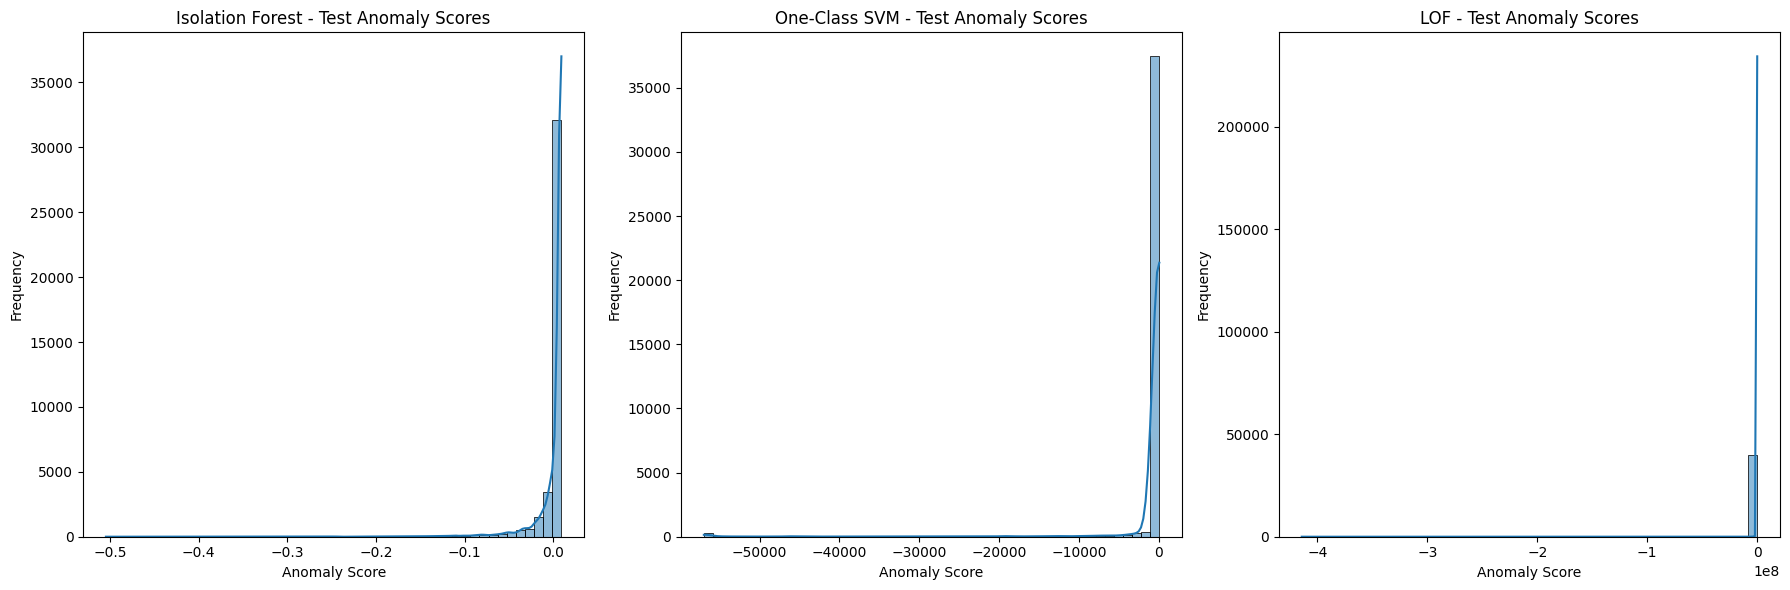


Top 5 Anomalies - Isolation Forest (Test Set):
      index  prediction                                     address  \
5308  27058          -1  0x50760803b75ecaeb43e09a8a5304827fb3dad1de   
6122  30885          -1  0xf138a94f2541e2cf299da4ae444f4d15eaee321a   
6744  33811          -1  0xadf5a7cb3962e393034748515fdc077a9d13a434   
6271  31471          -1  0x738696765dbcb15bbab8dc7b2255d5d30374e592   
6        34          -1  0x0681d8db095565fe8a346fa0277bffde9c0edbbf   

      anomaly_score                                        from   count  \
5308      -0.504683  0x50760803b75ecaeb43e09a8a5304827fb3dad1de     4.0   
6122      -0.498096  0xf138a94f2541e2cf299da4ae444f4d15eaee321a     1.0   
6744      -0.491049  0xadf5a7cb3962e393034748515fdc077a9d13a434     2.0   
6271      -0.457547  0x738696765dbcb15bbab8dc7b2255d5d30374e592   800.0   
6         -0.446360  0x0681d8db095565fe8a346fa0277bffde9c0edbbf  2573.0   

         sum_value  mean_value  median_value  min_value   max_value  \
530

In [16]:
import joblib

# --- Model Comparison (Test Set) ---

# 1. Make Predictions on Test Set using the *test mask*
test_features = graph_data.x[test_mask].numpy()
test_preds_if = best_model.predict(test_features)
test_preds_ocsvm = best_ocsvm.predict(test_features)
test_preds_lof = best_lof.predict(test_features)

# Get indices and addresses of test nodes
test_indices = np.where(test_mask.numpy())[0]
test_address = [graph_data.id_to_address[i] for i in test_indices]

# 2. Anomaly Score Distributions (Test Set)
test_anomaly_scores_if = best_model.decision_function(test_features)
test_anomaly_scores_ocsvm = best_ocsvm.decision_function(test_features)
test_anomaly_scores_lof = best_lof.decision_function(test_features)

# Plotting code remains the same...
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(test_anomaly_scores_if, bins=50, kde=True)
plt.title("Isolation Forest - Test Anomaly Scores")
plt.xlabel("Anomaly Score"); plt.ylabel("Frequency")
plt.subplot(1, 3, 2)
sns.histplot(test_anomaly_scores_ocsvm, bins=50, kde=True)
plt.title("One-Class SVM - Test Anomaly Scores")
plt.xlabel("Anomaly Score"); plt.ylabel("Frequency")
plt.subplot(1, 3, 3)
sns.histplot(test_anomaly_scores_lof, bins=50, kde=True)
plt.title("LOF - Test Anomaly Scores")
plt.xlabel("Anomaly Score"); plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3. Qualitative Analysis (Test Set)

# --- Isolation Forest ---
test_results_df_if = pd.DataFrame({
    'index': test_indices,
    'prediction': test_preds_if,
    'address': test_address,
    'anomaly_score': test_anomaly_scores_if
})
if 'aggregated_data' not in locals(): # Check if aggregated_data exists
     print("WARNING: aggregated_data not found globally. Recreating.")
     # Minimal recreation
     temp_data = pd.read_csv("eth_std_transactions.csv", on_bad_lines='warn')
     temp_data['value'] = pd.to_numeric(temp_data['value'], errors='coerce').fillna(0)
     temp_data['value_ether'] = temp_data['value'] / 1e18
     aggregated_data = temp_data.groupby('from').agg(count=('from', 'size'), sum_value=('value_ether', 'sum'), mean_value=('value_ether', 'mean'), median_value=('value_ether', 'median'), min_value=('value_ether', 'min'), max_value=('value_ether', 'max'), std_value=('value_ether', 'std')).reset_index()
     for col in aggregated_data.select_dtypes(include=np.number).columns: aggregated_data[col] = aggregated_data[col].fillna(aggregated_data[col].median())

test_results_df_if = test_results_df_if.merge(aggregated_data, left_on='address', right_on='from', how='left')
test_results_df_if = test_results_df_if.sort_values(by='anomaly_score')
print("\nTop 5 Anomalies - Isolation Forest (Test Set):")
print(test_results_df_if.head(5))

# --- One-Class SVM ---
test_results_df_ocsvm = pd.DataFrame({
    'index': test_indices,
    'prediction': test_preds_ocsvm,
    'address': test_address,
    'anomaly_score': test_anomaly_scores_ocsvm
})
test_results_df_ocsvm = test_results_df_ocsvm.merge(aggregated_data, left_on='address', right_on='from', how='left')
test_results_df_ocsvm = test_results_df_ocsvm.sort_values(by='anomaly_score')
print("\nTop 5 Anomalies - One-Class SVM (Test Set):")
print(test_results_df_ocsvm.head(5))

# --- LOF ---
test_results_df_lof = pd.DataFrame({
    'index': test_indices,
    'prediction': test_preds_lof,
    'address': test_address,
    'anomaly_score': test_anomaly_scores_lof
})
test_results_df_lof = test_results_df_lof.merge(aggregated_data, left_on='address', right_on='from', how='left')
test_results_df_lof = test_results_df_lof.sort_values(by='anomaly_score', ascending=False)
print("\nTop 5 Anomalies - LOF (Test Set):")
print(test_results_df_lof.head(5))

# --- 4. Save OCSVM and LOF models ---
joblib.dump(best_ocsvm, "best_ocsvm_model.joblib")
print(f"Trained OCSVM model saved to best_ocsvm_model.joblib")
joblib.dump(best_lof, "best_lof_model.joblib")
print(f"Trained LOF model saved to best_lof_model.joblib")

# --- 5. Simple Ensemble: Averaging Anomaly Scores ---
ensemble_scores = (test_anomaly_scores_if + test_anomaly_scores_ocsvm - test_anomaly_scores_lof) / 3.0
ensemble_df = pd.DataFrame({'index': test_indices, 'anomaly_score': ensemble_scores, 'address': test_address})
ensemble_df = ensemble_df.merge(aggregated_data, left_on = 'address', right_on='from', how='left')
ensemble_df = ensemble_df.sort_values(by='anomaly_score')
print("\nTop 5 Anomalies - Ensemble (Test Set):")
print(ensemble_df.head(5))

Evaluating IsolationForest...
Evaluating OneClassSVM...
Evaluating LocalOutlierFactor...

Plotting contamination results...


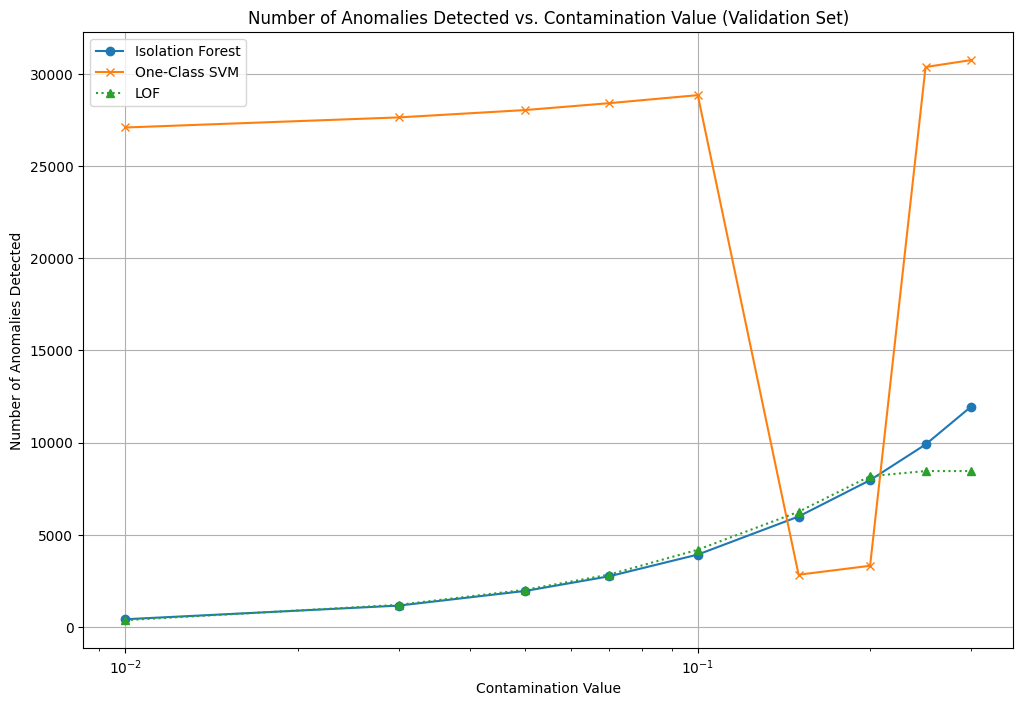

In [17]:
# Advanced Evaluation

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
import joblib 

def evaluate_contamination(model_class, params, train_features, val_features, contamination_values):
    """Evaluates a model over a range of contamination values."""
    results = []
    print(f"Evaluating {model_class.__name__}...") 
    for contamination in contamination_values:
        # Update contamination parameter
        current_params = params.copy() # Avoids modifying original params
        param_to_set = None
        if 'contamination' in current_params:
            param_to_set = 'contamination'
        elif 'nu' in current_params: # Handle OCSVM
            param_to_set = 'nu'

        if param_to_set:
            # Ensure contamination value is valid (e.g., OCSVM nu <= 0.5)
            if model_class == OneClassSVM and contamination > 0.5:
                print(f"  Skipping OCSVM with contamination (nu) > 0.5: {contamination}")
                results.append({'contamination': contamination, 'num_anomalies': np.nan})
                continue # Skip to next contamination value
            current_params[param_to_set] = contamination
        else:
            # If neither contamination nor nu is a param, try adding contamination
            if model_class == LocalOutlierFactor:
                 current_params['contamination'] = contamination
            else:
                 print(f"  Warning: Could not determine contamination parameter for {model_class.__name__}. Using provided params.")


        # Instantiate and train the model
        # Add necessary parameters ONLY if missing and applicable
        if model_class == IsolationForest:
            if 'random_state' not in current_params: current_params['random_state'] = 42
            if 'n_jobs' not in current_params: current_params['n_jobs'] = -1
        elif model_class == LocalOutlierFactor:
            if 'novelty' not in current_params: current_params['novelty'] = True
            # --- DO NOT ADD random_state for LOF ---
        elif model_class == OneClassSVM:
             # Add kernel='rbf' if not specified, as it's common
             if 'kernel' not in current_params: current_params['kernel'] = 'rbf'


        try:
            model = model_class(**current_params)
            model.fit(train_features)

            # Predict on validation features and store results
            preds = model.predict(val_features)
            num_detected = np.sum(preds == -1)
            results.append({'contamination': contamination, 'num_anomalies': num_detected})
            
        except Exception as e:
             print(f"  ERROR evaluating {model_class.__name__} with contamination {contamination}: {e}")
             # Append NaN or skip this contamination value
             results.append({'contamination': contamination, 'num_anomalies': np.nan})


    return pd.DataFrame(results)

# --- Evaluation Execution ---

# Define contamination values to test
contamination_values = [0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3] # Added more values

# Get train and validation features (ensure graph_data, train_mask, val_mask exist)
try:
    train_features = graph_data.x[train_mask].numpy()
    val_features = graph_data.x[val_mask].numpy()
except NameError:
    print("ERROR: graph_data, train_mask, or val_mask not defined. Rerun previous cells.")
    raise # Stop execution if data isn't ready

# Evaluate Isolation Forest 
try:
    if 'best_params' in locals():
        if_params = best_params.copy()
        results_if = evaluate_contamination(IsolationForest, if_params, train_features, val_features, contamination_values)
    else:
        print("WARNING: best_params for Isolation Forest not found. Skipping IF evaluation.")
        results_if = pd.DataFrame({'contamination': contamination_values, 'num_anomalies': np.nan})
except Exception as e:
    print(f"ERROR during Isolation Forest evaluation: {e}")
    results_if = pd.DataFrame({'contamination': contamination_values, 'num_anomalies': np.nan})


# Evaluate One-Class SVM 
try:
    if 'best_params_ocsvm' in locals():
        ocsvm_params = best_params_ocsvm.copy()
        results_ocsvm = evaluate_contamination(OneClassSVM, ocsvm_params, train_features, val_features, contamination_values)
    else:
        print("WARNING: best_params_ocsvm not found. Skipping OCSVM evaluation.")
        results_ocsvm = pd.DataFrame({'contamination': contamination_values, 'num_anomalies': np.nan})
except Exception as e:
    print(f"ERROR during OCSVM evaluation: {e}")
    results_ocsvm = pd.DataFrame({'contamination': contamination_values, 'num_anomalies': np.nan})


# Evaluate LOF 
try:
    if 'best_params_lof' in locals():
        lof_params = best_params_lof.copy()
        results_lof = evaluate_contamination(LocalOutlierFactor, lof_params, train_features, val_features, contamination_values)
    else:
        print("WARNING: best_params_lof not found. Skipping LOF evaluation.")
        results_lof = pd.DataFrame({'contamination': contamination_values, 'num_anomalies': np.nan})
except Exception as e:
    print(f"ERROR during LOF evaluation: {e}")
    results_lof = pd.DataFrame({'contamination': contamination_values, 'num_anomalies': np.nan})


# Plotting
print("\nPlotting contamination results...")
plt.figure(figsize=(12, 8))

if not results_if.empty and not results_if['num_anomalies'].isnull().all():
    plt.plot(results_if['contamination'], results_if['num_anomalies'], marker='o', label='Isolation Forest')
if not results_ocsvm.empty and not results_ocsvm['num_anomalies'].isnull().all():
    plt.plot(results_ocsvm['contamination'], results_ocsvm['num_anomalies'], marker='x', label='One-Class SVM')
if not results_lof.empty and not results_lof['num_anomalies'].isnull().all():
    plt.plot(results_lof['contamination'], results_lof['num_anomalies'], marker='^', linestyle=':', label='LOF')

plt.title('Number of Anomalies Detected vs. Contamination Value (Validation Set)')
plt.xlabel('Contamination Value')
plt.ylabel('Number of Anomalies Detected')
plt.legend()
plt.grid(True)
plt.xscale('log') # Used a log scale for better visualization
plt.show()

In [18]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# --- GNN Encoder Definition ---

class GNNEncoder(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels) # Output embedding layer

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        # No activation on the final embedding layer is common
        x = self.conv2(x, edge_index)
        return x

# Example Instantiation (adjusted hidden/out channels as needed)
# num_features comes from the previous load_and_preprocess step
embedding_dim = 64 # Dimension of the learned node embeddings
gnn_encoder = GNNEncoder(num_features, 128, embedding_dim).to(device)

print("GNN Encoder Definition:")
print(gnn_encoder)

GNN Encoder Definition:
GNNEncoder(
  (conv1): GCNConv(7, 128)
  (conv2): GCNConv(128, 64)
)


In [19]:
import torch
from torch_geometric.utils import negative_sampling

# --- Link Prediction Setup ---

def train_gnn_link_pred(model, graph_data, optimizer):
    model.train()
    optimizer.zero_grad()

    # Use nodes from the training mask for training
    z = model(graph_data.x, graph_data.edge_index) # Get embeddings for ALL nodes

    # --- Link Prediction Loss ---
    # 1. Positive Edges: Use edges within the training set (approximation)
    # A common approach is to use all edges for message passing,
    # but only calculate loss on edges involving training nodes.
    # Used all edges for loss calculation.


    pos_edge_index = graph_data.edge_index

    # 2. Negative Edges: Sample edges that *don't* exist
    neg_edge_index = negative_sampling(
        edge_index=pos_edge_index,
        num_nodes=graph_data.num_nodes,
        num_neg_samples=pos_edge_index.size(1), # Sample as many neg edges as pos edges
        method='sparse'
    )

    # Combine positive and negative edges
    edge_label_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
    # Create labels: 1 for positive, 0 for negative
    edge_label = torch.cat([
        torch.ones(pos_edge_index.size(1)),
        torch.zeros(neg_edge_index.size(1))
    ], dim=0).to(device)

    # Calculate scores for edges using dot product of embeddings
    out = (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

    # Use Binary Cross-Entropy with Logits loss
    loss = F.binary_cross_entropy_with_logits(out, edge_label)

    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def get_embeddings(model, graph_data):
    """Generates node embeddings using the trained GNN model."""
    model.eval()
    embeddings = model(graph_data.x, graph_data.edge_index)
    return embeddings

In [20]:
import torch.optim as optim

# --- GNN Training Loop ---

# Move graph data to device
graph_data = graph_data.to(device)

# Optimizer for GNN
gnn_optimizer = optim.Adam(gnn_encoder.parameters(), lr=0.01) # Adjust LR

epochs = 1000 # Adjust number of epochs
print("\nStarting GNN Training (Link Prediction)...")
for epoch in range(epochs):
    loss = train_gnn_link_pred(gnn_encoder, graph_data, gnn_optimizer)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

print("GNN Training complete.")

# --- Extract Final Embeddings ---
final_embeddings = get_embeddings(gnn_encoder, graph_data).cpu().numpy() # Move to CPU, convert to numpy

print(f"Shape of learned embeddings: {final_embeddings.shape}") # Should be (num_nodes, embedding_dim)


Starting GNN Training (Link Prediction)...
Epoch 10/1000, Loss: 17.3797
Epoch 20/1000, Loss: 5.5086
Epoch 30/1000, Loss: 1.6880
Epoch 40/1000, Loss: 1.0518
Epoch 50/1000, Loss: 0.7600
Epoch 60/1000, Loss: 0.6114
Epoch 70/1000, Loss: 0.5366
Epoch 80/1000, Loss: 0.5042
Epoch 90/1000, Loss: 0.4818
Epoch 100/1000, Loss: 0.4702
Epoch 110/1000, Loss: 0.4603
Epoch 120/1000, Loss: 0.4534
Epoch 130/1000, Loss: 0.4476
Epoch 140/1000, Loss: 0.4445
Epoch 150/1000, Loss: 0.4419
Epoch 160/1000, Loss: 0.4396
Epoch 170/1000, Loss: 0.4375
Epoch 180/1000, Loss: 0.4364
Epoch 190/1000, Loss: 0.4350
Epoch 200/1000, Loss: 0.4335
Epoch 210/1000, Loss: 0.4332
Epoch 220/1000, Loss: 0.4322
Epoch 230/1000, Loss: 0.4308
Epoch 240/1000, Loss: 0.4305
Epoch 250/1000, Loss: 0.4296
Epoch 260/1000, Loss: 0.4290
Epoch 270/1000, Loss: 0.4284
Epoch 280/1000, Loss: 0.4283
Epoch 290/1000, Loss: 0.4277
Epoch 300/1000, Loss: 0.4269
Epoch 310/1000, Loss: 0.4271
Epoch 320/1000, Loss: 0.4265
Epoch 330/1000, Loss: 0.4259
Epoch 3

Shape of Training Embeddings: (119204, 64)
Shape of Validation Embeddings: (39735, 64)
Shape of Test Embeddings: (39735, 64)

--- Training Isolation Forest with GNN Embeddings ---
Isolation Forest (GNN) trained.

--- Training One-Class SVM with GNN Embeddings ---
One-Class SVM (GNN) trained.

--- Training LOF with GNN Embeddings ---
LOF (GNN) trained.

--- Evaluating Models with GNN Embeddings (Test Set) ---

Top 5 Anomalies - IF (GNN Embeddings):
        index  prediction                                     address  \
15518   78184          -1  0x00000000219ab540356cbb839cbe05303d7705fa   
14058   70903          -1  0x87c9dbff0016af23f5b1ab9b8e072124ab729193   
12922   65112          -1  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
21554  107959          -1  0xd9e2ae68e8b0ea8616143e1ebfdc6177c2a73817   
12947   65271          -1  0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   

       anomaly_score  
15518      -0.584027  
14058      -0.551193  
12922      -0.515253  
21554      -0.506

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


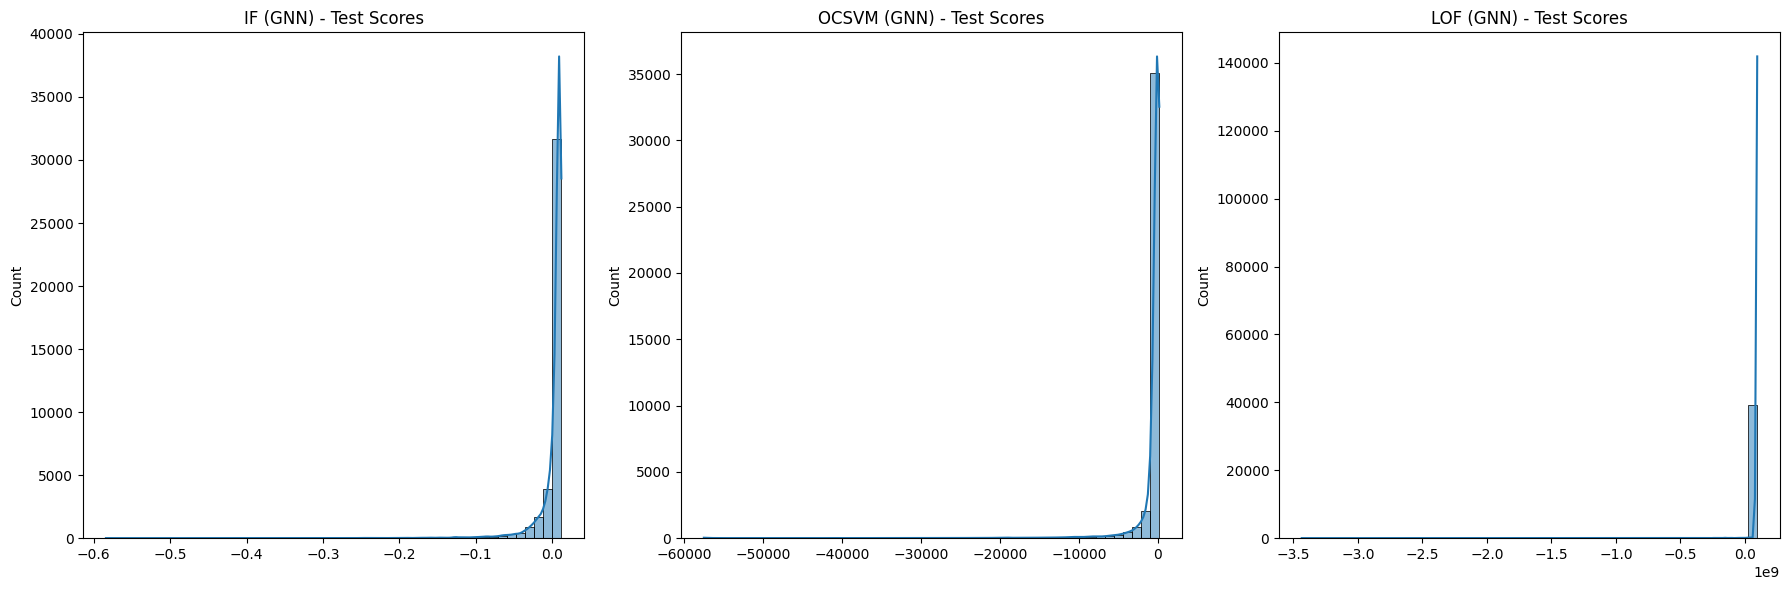

In [21]:
# --- Anomaly Detection with GNN Embeddings ---

# 1. Prepare Features (using masks and final_embeddings)
# Ensures final_embeddings is a NumPy array on CPU
if isinstance(final_embeddings, torch.Tensor):
    final_embeddings = final_embeddings.cpu().numpy()

train_embeddings = final_embeddings[train_mask.cpu().numpy()] # Use boolean mask on numpy array
val_embeddings = final_embeddings[val_mask.cpu().numpy()]
test_embeddings = final_embeddings[test_mask.cpu().numpy()]

print(f"Shape of Training Embeddings: {train_embeddings.shape}")
print(f"Shape of Validation Embeddings: {val_embeddings.shape}")
print(f"Shape of Test Embeddings: {test_embeddings.shape}")

# 2. Retrain Models with Embeddings (using best hyperparameters)

# --- Isolation Forest (GNN Embeddings) ---
print("\n--- Training Isolation Forest with GNN Embeddings ---")

if 'best_params' in locals():
    if_gnn = IsolationForest(**best_params, random_state=42, n_jobs=-1)
    if_gnn.fit(train_embeddings)
    print("Isolation Forest (GNN) trained.")
else:
    print("WARNING: best_params not found. Cannot train Isolation Forest (GNN).")
    if_gnn = None

# --- One-Class SVM (GNN Embeddings) ---
print("\n--- Training One-Class SVM with GNN Embeddings ---")

if 'best_params_ocsvm' in locals():
    # Ensure kernel='rbf' is included if not in best_params
    ocsvm_gnn_params = best_params_ocsvm.copy()
    if 'kernel' not in ocsvm_gnn_params: ocsvm_gnn_params['kernel'] = 'rbf'
    ocsvm_gnn = OneClassSVM(**ocsvm_gnn_params)
    ocsvm_gnn.fit(train_embeddings)
    print("One-Class SVM (GNN) trained.")
else:
    print("WARNING: best_params_ocsvm not found. Cannot train OCSVM (GNN).")
    ocsvm_gnn = None

# --- LOF (GNN Embeddings) ---
print("\n--- Training LOF with GNN Embeddings ---")

if 'best_params_lof' in locals():
    lof_gnn_params = best_params_lof.copy()
    lof_gnn_params['novelty'] = True # Ensure novelty is set
    lof_gnn = LocalOutlierFactor(**lof_gnn_params)
    lof_gnn.fit(train_embeddings)
    print("LOF (GNN) trained.")
else:
    print("WARNING: best_params_lof not found. Cannot train LOF (GNN).")
    lof_gnn = None


# 3. Evaluate Models with Embeddings (Test Set Example)

print("\n--- Evaluating Models with GNN Embeddings (Test Set) ---")

# Gets test indices and addresses (if not already available globally)
if 'test_mask' not in locals() or 'graph_data' not in locals():
     print("Error: test_mask or graph_data not defined. Rerun previous cells.")

else:
    test_indices = np.where(test_mask.cpu().numpy())[0]
    test_address = [graph_data.id_to_address[i] for i in test_indices]

    # --- Isolation Forest (GNN) Evaluation ---
    if if_gnn:
        test_scores_if_gnn = if_gnn.decision_function(test_embeddings)
        test_preds_if_gnn = if_gnn.predict(test_embeddings)
        results_if_gnn = pd.DataFrame({
            'index': test_indices, 'prediction': test_preds_if_gnn,
            'address': test_address, 'anomaly_score': test_scores_if_gnn
        }).sort_values(by='anomaly_score')
        print("\nTop 5 Anomalies - IF (GNN Embeddings):")
        print(results_if_gnn.head(5))
    else: print("Skipping IF (GNN) evaluation.")

    # --- OCSVM (GNN) Evaluation ---
    if ocsvm_gnn:
        test_scores_ocsvm_gnn = ocsvm_gnn.decision_function(test_embeddings)
        test_preds_ocsvm_gnn = ocsvm_gnn.predict(test_embeddings)
        results_ocsvm_gnn = pd.DataFrame({
            'index': test_indices, 'prediction': test_preds_ocsvm_gnn,
            'address': test_address, 'anomaly_score': test_scores_ocsvm_gnn
        }).sort_values(by='anomaly_score')
        print("\nTop 5 Anomalies - OCSVM (GNN Embeddings):")
        print(results_ocsvm_gnn.head(5))
    else: print("Skipping OCSVM (GNN) evaluation.")

    # --- LOF (GNN) Evaluation ---
    if lof_gnn:
        test_scores_lof_gnn = lof_gnn.decision_function(test_embeddings)
        test_preds_lof_gnn = lof_gnn.predict(test_embeddings)
        results_lof_gnn = pd.DataFrame({
            'index': test_indices, 'prediction': test_preds_lof_gnn,
            'address': test_address, 'anomaly_score': test_scores_lof_gnn
        }).sort_values(by='anomaly_score', ascending=False) # LOF scores inverted
        print("\nTop 5 Anomalies - LOF (GNN Embeddings):")
        print(results_lof_gnn.head(5))
    else: print("Skipping LOF (GNN) evaluation.")

    # --- Plotting Anomaly Score Distributions (GNN Embeddings) ---
    plt.figure(figsize=(18, 6))
    if if_gnn:
        plt.subplot(1, 3, 1); sns.histplot(test_scores_if_gnn, bins=50, kde=True)
        plt.title("IF (GNN) - Test Scores")
    if ocsvm_gnn:
        plt.subplot(1, 3, 2); sns.histplot(test_scores_ocsvm_gnn, bins=50, kde=True)
        plt.title("OCSVM (GNN) - Test Scores")
    if lof_gnn:
        plt.subplot(1, 3, 3); sns.histplot(test_scores_lof_gnn, bins=50, kde=True)
        plt.title("LOF (GNN) - Test Scores")
    plt.tight_layout()
    plt.show()

Comparing Anomaly Detection Results: Aggregated Features vs. GNN Embeddings


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

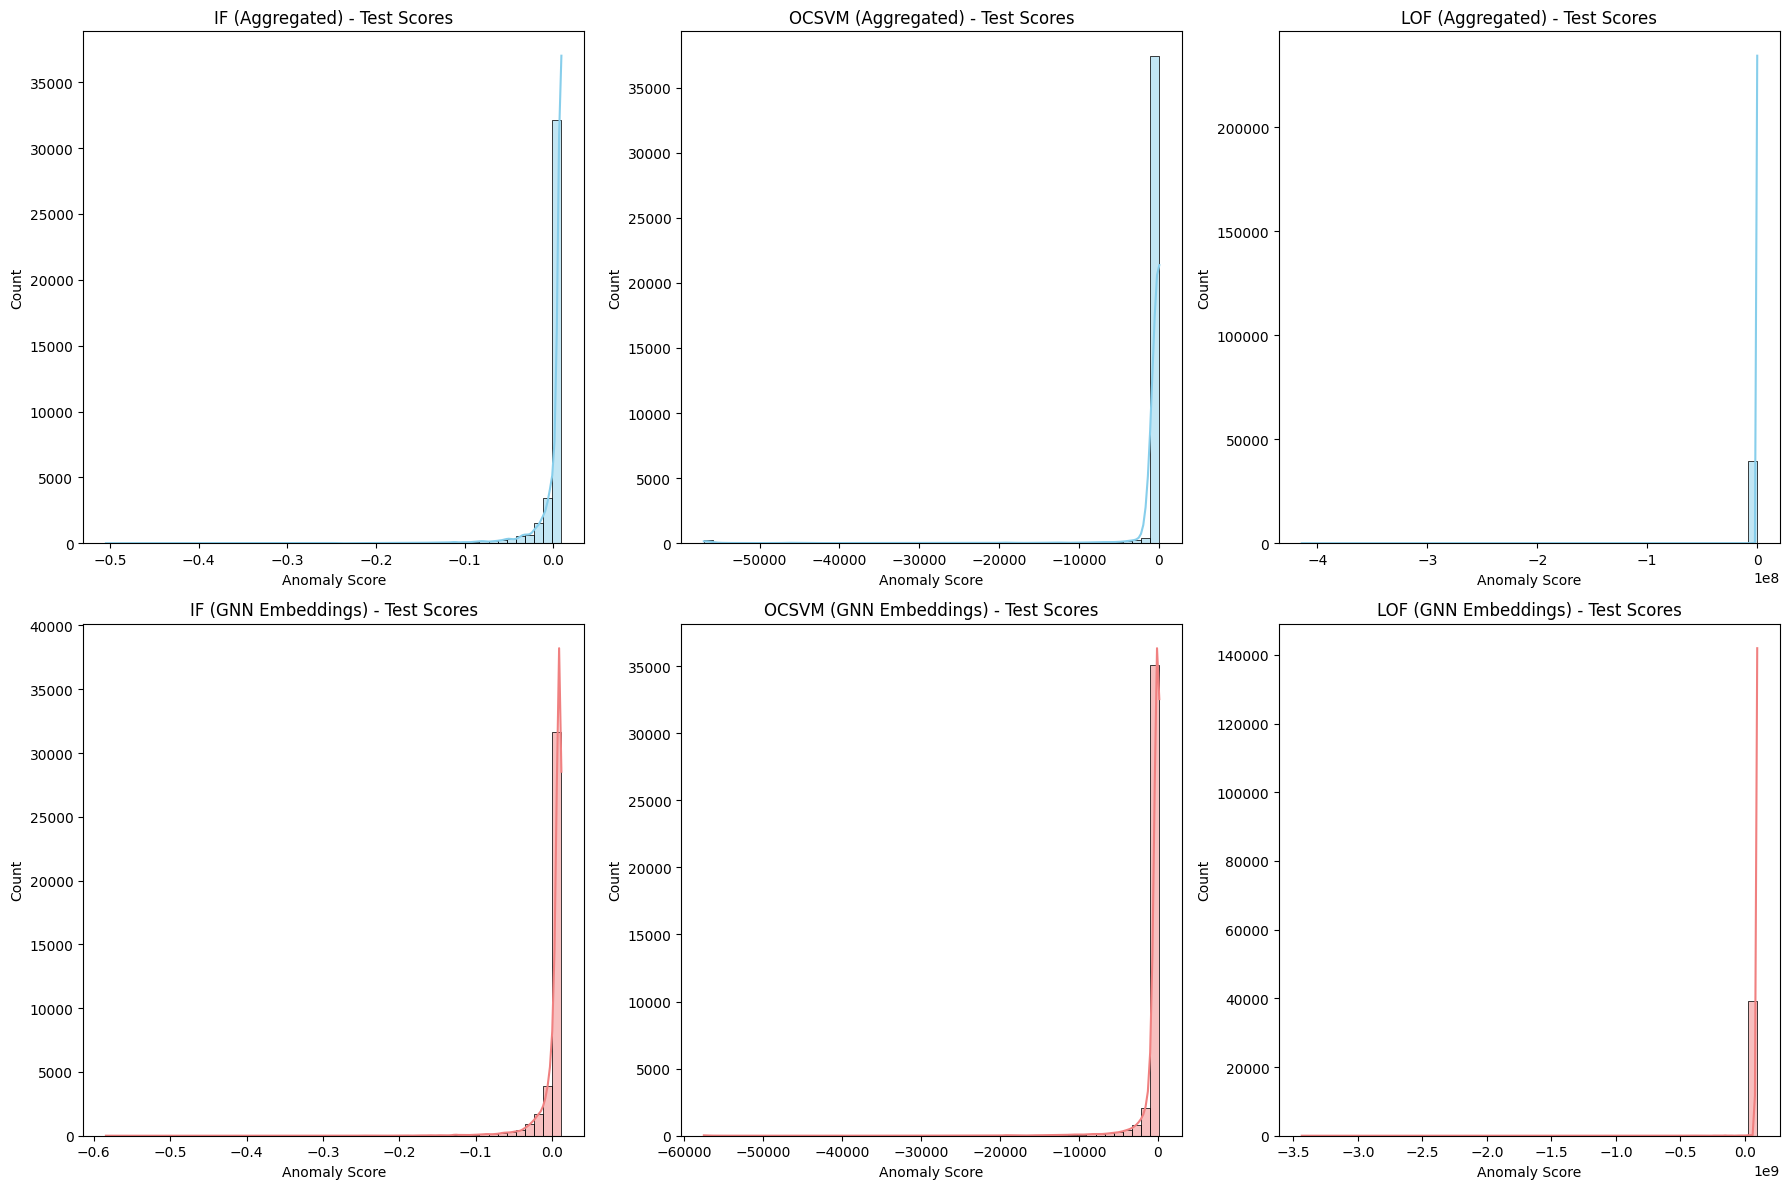


--- Top 50 Comparison (anomaly_score) ---
Overlap (in both): 9
Only in Aggregated Features: 41
Only in GNN Embeddings: 41
---------------------------------

--- Top 50 Comparison (anomaly_score) ---
Overlap (in both): 3
Only in Aggregated Features: 47
Only in GNN Embeddings: 47
---------------------------------

--- Top 50 Comparison (anomaly_score) ---
Overlap (in both): 0
Only in Aggregated Features: 50
Only in GNN Embeddings: 50
---------------------------------

Further analysis suggested:
- Manually inspect addresses found ONLY by GNN embeddings.
- Manually inspect addresses found ONLY by aggregated features.
- Correlate anomaly scores with specific aggregated features vs. GNN embedding dimensions (more advanced).


In [22]:
# --- Comparison: Aggregated Features vs. GNN Embeddings ---

print("Comparing Anomaly Detection Results: Aggregated Features vs. GNN Embeddings")

# Ensure all necessary results DataFrames exist from previous cells
required_dfs_agg = ['test_results_df_if', 'test_results_df_ocsvm', 'test_results_df_lof']
required_dfs_gnn = ['results_if_gnn', 'results_ocsvm_gnn', 'results_lof_gnn']
missing_dfs = []
for df_name in required_dfs_agg + required_dfs_gnn:
    if df_name not in locals():
        missing_dfs.append(df_name)

if missing_dfs:
    print(f"ERROR: Required results DataFrames missing: {missing_dfs}. Rerun previous cells (esp. Cell 14 and Cell 19).")

    raise NameError(f"Missing results DataFrames: {missing_dfs}")


# 1. Compare Anomaly Score Distributions (Side-by-Side)

plt.figure(figsize=(18, 12))
# --- Isolation Forest ---
plt.subplot(2, 3, 1)
sns.histplot(test_results_df_if['anomaly_score'], bins=50, kde=True, color='skyblue')
plt.title("IF (Aggregated) - Test Scores")
plt.xlabel("Anomaly Score")

plt.subplot(2, 3, 4) # Place GNN result below
sns.histplot(results_if_gnn['anomaly_score'], bins=50, kde=True, color='lightcoral')
plt.title("IF (GNN Embeddings) - Test Scores")
plt.xlabel("Anomaly Score")

# --- OCSVM ---
plt.subplot(2, 3, 2)
sns.histplot(test_results_df_ocsvm['anomaly_score'], bins=50, kde=True, color='skyblue')
plt.title("OCSVM (Aggregated) - Test Scores")
plt.xlabel("Anomaly Score")

plt.subplot(2, 3, 5) # Place GNN result below
sns.histplot(results_ocsvm_gnn['anomaly_score'], bins=50, kde=True, color='lightcoral')
plt.title("OCSVM (GNN Embeddings) - Test Scores")
plt.xlabel("Anomaly Score")

# --- LOF ---
plt.subplot(2, 3, 3)
sns.histplot(test_results_df_lof['anomaly_score'], bins=50, kde=True, color='skyblue')
plt.title("LOF (Aggregated) - Test Scores")
plt.xlabel("Anomaly Score")

plt.subplot(2, 3, 6) # Place GNN result below
sns.histplot(results_lof_gnn['anomaly_score'], bins=50, kde=True, color='lightcoral')
plt.title("LOF (GNN Embeddings) - Test Scores")
plt.xlabel("Anomaly Score")

plt.tight_layout()
plt.show()


# 2. Compare Top K Anomalies (Overlap/Difference)

def compare_top_k(df1, df2, k=20, score_col='anomaly_score', ascending=True):
    """Compares the top K addresses between two results DataFrames."""
    top_k_df1 = df1.sort_values(by=score_col, ascending=ascending).head(k)['address'].tolist()
    top_k_df2 = df2.sort_values(by=score_col, ascending=ascending).head(k)['address'].tolist()

    set1 = set(top_k_df1)
    set2 = set(top_k_df2)

    intersection = set1.intersection(set2)
    only_in_df1 = set1 - set2
    only_in_df2 = set2 - set1

    print(f"\n--- Top {k} Comparison ({score_col}) ---")
    print(f"Overlap (in both): {len(intersection)}")
    # print(f"  Addresses: {list(intersection)}") # Uncomment to see specific addresses
    print(f"Only in Aggregated Features: {len(only_in_df1)}")
    # print(f"  Addresses: {list(only_in_df1)}") # Uncomment to see specific addresses
    print(f"Only in GNN Embeddings: {len(only_in_df2)}")
    # print(f"  Addresses: {list(only_in_df2)}") # Uncomment to see specific addresses
    print("-" * (20 + len(score_col)))


# Compare for each model
compare_top_k(test_results_df_if, results_if_gnn, k=50, score_col='anomaly_score', ascending=True) # IF scores: lower is more anomalous
compare_top_k(test_results_df_ocsvm, results_ocsvm_gnn, k=50, score_col='anomaly_score', ascending=True) # OCSVM scores: lower is more anomalous
compare_top_k(test_results_df_lof, results_lof_gnn, k=50, score_col='anomaly_score', ascending=False) # LOF scores: higher is more anomalous


print("\nFurther analysis suggested:")
print("- Manually inspect addresses found ONLY by GNN embeddings.")
print("- Manually inspect addresses found ONLY by aggregated features.")
print("- Correlate anomaly scores with specific aggregated features vs. GNN embedding dimensions (more advanced).")